In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import datetime as dt

In [48]:
ds = xr.open_dataset("/Users/azeez/water_prediction/ai4ls_2_water_prediction/data/CSR_GRACE_GRACE-FO_RL0602_Mascons_all-corrections.nc")
ds

<xarray.Dataset>
Dimensions:        (time: 232, timebound: 2, lon: 1440, lat: 720)
Coordinates:
  * time           (time) float32 107.0 129.5 227.5 ... 8.11e+03 8.141e+03
  * lon            (lon) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * lat            (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
Dimensions without coordinates: timebound
Data variables:
    time_bounds    (time, timebound) float32 ...
    lwe_thickness  (time, lat, lon) float32 ...
Attributes: (12/59)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    filename:                   netcdf/CSR_GRACE_GRACE-FO_RL0602_Mascons_all-...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      CSR GRACE and GRACE-FO MASCON RL0602M
    subtitle:                   RL06.2 GRACE/GRACE-FO Total water storage wit...
    ...                         ...
    user_note_3:                Ellipsoidal correction has been applied. The ...
    user_note_4:                This GRACE-FO RL06.2 data is an updated versi...
    date_created:               2024-07-14T18:38:23Z
    variable:                   liquid water equivalent thickness
    label:                      RL0602rc24cE
    Mask:                       Global

In [3]:
# variables in dataset
ds.data_vars

Data variables:
    time_bounds    (time, timebound) float32 ...
    lwe_thickness  (time, lat, lon) float32 ...

In [4]:
ds.dims

Frozen({'time': 232, 'timebound': 2, 'lon': 1440, 'lat': 720})

In [5]:
ds.coords

Coordinates:
  * time     (time) float32 107.0 129.5 227.5 ... 8.08e+03 8.11e+03 8.141e+03
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88

In [6]:
ds.info()

xarray.Dataset {
dimensions:
	time = 232 ;
	timebound = 2 ;
	lon = 1440 ;
	lat = 720 ;

variables:
	float32 time_bounds(time, timebound) ;
	float32 time(time) ;
		time:bounds = time_bounds ;
		time:calendar = gregorian ;
		time:axis = T ;
		time:standard_name = Time ;
		time:long_name = Time ;
		time:Units = days since 2002-01-01T00:00:00Z ;
	float32 lon(lon) ;
		lon:bounds = lon_bounds ;
		lon:valid_max = 359.875 ;
		lon:valid_min = 0.125 ;
		lon:axis = X ;
		lon:standard_name = Longitude ;
		lon:long_name = Longitude ;
		lon:Units = degrees_east ;
	float32 lat(lat) ;
		lat:bounds = lat_bounds ;
		lat:valid_max = 89.875 ;
		lat:valid_min = -89.875 ;
		lat:axis = Y ;
		lat:standard_name = Latitude ;
		lat:long_name = Latitude ;
		lat:Units = degrees_north ;
	float32 lwe_thickness(time, lat, lon) ;
		lwe_thickness:grid_mapping = WGS84 ;
		lwe_thickness:standard_name = Liquid_Water_Equivalent_Thickness ;
		lwe_thickness:long_name = Liquid_Water_Equivalent_Thickness ;
		lwe_thickness:Unit

In [7]:
ds.attrs

{'Conventions': 'CF-1.6, ACDD-1.3, ISO 8601',
 'filename': 'netcdf/CSR_GRACE_GRACE-FO_RL0602_Mascons_all-corrections.nc',
 'Metadata_Conventions': 'Unidata Dataset Discovery v1.0',
 'standard_name_vocabulary': 'NetCDF Climate and Forecast (CF) Metadata Convention-1.6',
 'title': 'CSR GRACE and GRACE-FO MASCON RL0602M',
 'subtitle': 'RL06.2 GRACE/GRACE-FO Total water storage with all correction applied',
 'summary': 'Monthly mass anomaly grids from GRACE and GRACE-FO determined from CSR RL06.2 processing',
 'keywords': 'Solid Earth, Geodetics/Gravity, Gravity, liquid_water_equivalent_thickness',
 'keywords_vocabulary': 'NASA Global Change Master Directory (GCMD) Science Keywords',
 'platform': 'GRACE and GRACE-FO',
 'institution': 'The University of Texas - Center for Space Research (CSR)',
 'creator_name': 'Himanshu Save',
 'creator_email': 'grace@csr.utexas.edu',
 'creator_url': 'http://www2.csr.utexas.edu/grace',
 'creator_type': 'group',
 'creator_institution': 'UT-CSR',
 'publisher

In [8]:
# check the unit of the time and change to datatime dtype if necessary
ds.lwe_thickness.time.attrs["Units"]

'days since 2002-01-01T00:00:00Z'

In [49]:
# Extract the time coordinate values and units
time_values = ds.lwe_thickness.time.values
time_units = ds.lwe_thickness.time.attrs['Units']

# Extract the base time from the Units attribute
base_time_str = time_units.split('since ')[1]
base_time = pd.to_datetime(base_time_str)
time_as_datetime = base_time + pd.to_timedelta(time_values, unit='D')

time_as_datetime_np = np.array(time_as_datetime, dtype='datetime64[ns]')

# Replace the time coordinate in the dataset with the datetime64 values
ds = ds.assign_coords(time=('time', time_as_datetime_np))
ds

<xarray.Dataset>
Dimensions:        (time: 232, timebound: 2, lon: 1440, lat: 720)
Coordinates:
  * time           (time) datetime64[ns] 2002-04-18 ... 2024-04-16
  * lon            (lon) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * lat            (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
Dimensions without coordinates: timebound
Data variables:
    time_bounds    (time, timebound) float32 ...
    lwe_thickness  (time, lat, lon) float32 ...
Attributes: (12/59)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    filename:                   netcdf/CSR_GRACE_GRACE-FO_RL0602_Mascons_all-...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      CSR GRACE and GRACE-FO MASCON RL0602M
    subtitle:                   RL06.2 GRACE/GRACE-FO Total water storage wit...
    ...                         ...
    user_note_3:                Ellipsoidal correction has been applied. The ...
    user_note_4:                This GRACE-FO RL06.2 data is an updated versi...
    date_created:               2024-07-14T18:38:23Z
    variable:                   liquid water equivalent thickness
    label:                      RL0602rc24cE
    Mask:                       Global

In [10]:
ds.lwe_thickness

<xarray.DataArray 'lwe_thickness' (time: 232, lat: 720, lon: 1440)>
[240537600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2002-04-18 2002-05-10T12:00:00 ... 2024-04-16
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
Attributes:
    grid_mapping:   WGS84
    standard_name:  Liquid_Water_Equivalent_Thickness
    long_name:      Liquid_Water_Equivalent_Thickness
    Units:          cm

In [11]:
ds.time_bounds

<xarray.DataArray 'time_bounds' (time: 232, timebound: 2)>
[464 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2002-04-18 2002-05-10T12:00:00 ... 2024-04-16
Dimensions without coordinates: timebound

In [12]:
ds.lwe_thickness.values

array([[[-2.7126658 , -2.7126658 , -2.7126658 , ..., -2.7126658 ,
         -2.7126658 , -2.7126658 ],
        [-2.7126658 , -2.7126658 , -2.7126658 , ..., -2.7126658 ,
         -2.7126658 , -2.7126658 ],
        [-3.493693  , -3.493693  , -3.493693  , ..., -3.493693  ,
         -3.493693  , -3.493693  ],
        ...,
        [-2.4626598 , -2.4626598 , -2.4626598 , ..., -2.4626598 ,
         -2.4626598 , -2.4626598 ],
        [-2.62308   , -2.62308   , -2.62308   , ..., -2.62308   ,
         -2.62308   , -2.62308   ],
        [-2.62308   , -2.62308   , -2.62308   , ..., -2.62308   ,
         -2.62308   , -2.62308   ]],

       [[-1.9613819 , -1.9613819 , -1.9613819 , ..., -1.9613819 ,
         -1.9613819 , -1.9613819 ],
        [-1.9613819 , -1.9613819 , -1.9613819 , ..., -1.9613819 ,
         -1.9613819 , -1.9613819 ],
        [-2.8264503 , -2.8264503 , -2.8264503 , ..., -2.8264503 ,
         -2.8264503 , -2.8264503 ],
        ...,
        [-4.330787  , -4.330787  , -4.330787  , ..., -

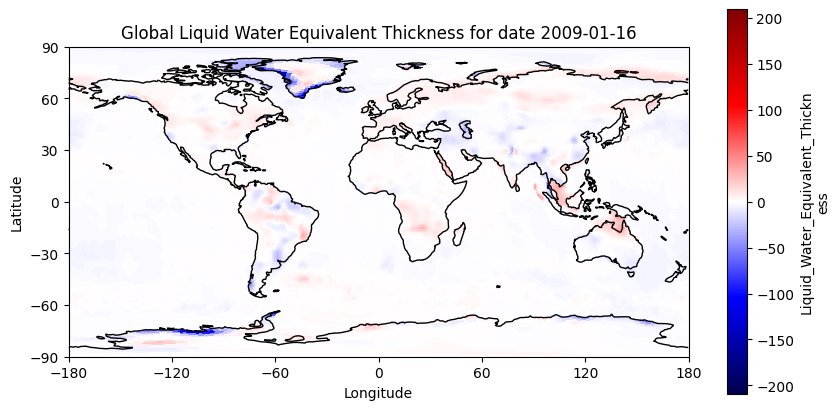

In [50]:
def plot_map(xr_data, var, title="Global Liquid Water Equivalent Thickness"):

    plt.figure(figsize=(10, 5))
    ax = plt.axes(projection=ccrs.PlateCarree())

    timeslice = xr_data.sel(time=dt.datetime(2009,1,10), method="nearest")   # edit to date of choice
    timeslice[var].plot(ax=ax, transform=ccrs.PlateCarree(), cmap="seismic")
    ax.coastlines()
    plt.title(f'{title} for date {timeslice.time.values.astype("datetime64[D]")}')
    ax.set_xticks(range(-180, 181, 60), crs=ccrs.PlateCarree())
    ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()

    # free resources
    del timeslice

plot_map(ds, "lwe_thickness")

In [5]:
# convert dataset to datafram
df = ds.to_dataframe()
df

time_bounds  lwe_thickness
time       timebound lon     lat                                
2002-04-18 0         0.125   -89.875         94.0      -2.712666
                             -89.625         94.0      -2.712666
                             -89.375         94.0      -3.493693
                             -89.125         94.0      -3.493693
                             -88.875         94.0      -3.493693
...                                           ...            ...
2024-04-16 1         359.875  88.875       8156.0       5.076348
                              89.125       8156.0       5.076348
                              89.375       8156.0       5.076348
                              89.625       8156.0       4.672384
                              89.875       8156.0       4.672384

[481075200 rows x 2 columns]

In [6]:
df.reset_index(inplace=True)
df

,time,timebound,lon,lat,time_bounds,lwe_thickness
0,2002-04-18,0,0.125,-89.875,94.0,-2.712666
1,2002-04-18,0,0.125,-89.625,94.0,-2.712666
2,2002-04-18,0,0.125,-89.375,94.0,-3.493693
3,2002-04-18,0,0.125,-89.125,94.0,-3.493693
4,2002-04-18,0,0.125,-88.875,94.0,-3.493693
...,...,...,...,...,...,...
481075195,2024-04-16,1,359.875,88.875,8156.0,5.076348
481075196,2024-04-16,1,359.875,89.125,8156.0,5.076348
481075197,2024-04-16,1,359.875,89.375,8156.0,5.076348
481075198,2024-04-16,1,359.875,89.625,8156.0,4.672384


In [ ]:
# <Omar Part>

In [7]:
# free resources
try:
    del ds
    print("Deleted ds object")
except:
    pass

Deleted ds object


In [8]:
lat_min = -90
lat_max = 90
long_min = -180
long_max = 180

patch_len = 10 # => 10 x 10 patches all over the map

patches = []


for long in range(long_min, long_max - patch_len + 1, patch_len):
    for lat in range(lat_min, lat_max - patch_len + 1, patch_len):
        
        patch_lat_start = lat
        patch_lat_end = lat + patch_len
        patch_long_start = long
        patch_long_end = long+ patch_len
        
        patches.append({
            "long_start": patch_long_start,
            "long_end": patch_long_end,
            "lat_start": patch_lat_start,
            "lat_end": patch_lat_end,
        })
        
#         print("- Patch:")
#         print("\tlat: {0}<=>{1}".format(patch_lat_start, patch_lat_end))
#         print("\tlong: {0}<=>{1}".format(patch_long_start, patch_long_end))
print("Patches of {0} X {0} created all over the map!".format(patch_len, patch_len))

Patches of 10 X 10 created all over the map!


In [9]:
# Let's Query a grid
patch = patches[385]
print(patch)

{'long_start': 30, 'long_end': 40, 'lat_start': -20, 'lat_end': -10}


In [30]:
lat_start = patch["lat_start"]
lat_end = patch["lat_end"]
long_start = patch["long_start"]
long_end = patch["long_end"]

df_patch = df.query("@long_start <= lon <= @long_end and @lat_start <= lat <= @lat_end")
df_patch

,time,timebound,lon,lat,time_bounds,lwe_thickness
86680,2002-04-18,0,30.125,-19.875,94.0,4.547832
86681,2002-04-18,0,30.125,-19.625,94.0,6.040079
86682,2002-04-18,0,30.125,-19.375,94.0,6.040079
86683,2002-04-18,0,30.125,-19.125,94.0,6.040079
86684,2002-04-18,0,30.125,-18.875,94.0,6.941958
...,...,...,...,...,...,...
480153195,2024-04-16,1,39.875,-11.125,8156.0,27.634113
480153196,2024-04-16,1,39.875,-10.875,8156.0,27.634113
480153197,2024-04-16,1,39.875,-10.625,8156.0,27.634113
480153198,2024-04-16,1,39.875,-10.375,8156.0,47.776115


In [ ]:
# <Omar Part>

### Average the Lwe-thickness varible monthly and add exogenous features [`Azeez`]

In [ ]:
# Convert the latitude to radian
df_patch['lat_rad'] = np.radians(df_patch['lat'])

# Cosine weighting is used because the Earth is spherical, and areas closer to the poles appear smaller when projected onto a flat map (like a grid).
df_patch['cosine_weight'] = np.cos(df_patch['lat_rad']) 

# Compute weighted sums and total weights
df_patch['weighted_lwe'] = df_patch['lwe_thickness'] * df_patch['cosine_weight']

# Group by 'time' and aggregate using sum
grouped = df_patch.groupby('time').agg({'weighted_lwe': 'sum', 'cosine_weight': 'sum'})
grouped['avg_lwe_thickness'] = grouped['weighted_lwe'] / grouped['cosine_weight']

grouped.drop(["weighted_lwe", "cosine_weight"], axis=1, inplace=True)
grouped.reset_index(inplace=True)
grouped['time'] = pd.to_datetime(grouped['time'])
grouped['time'] = grouped['time'].dt.date

In [33]:
grouped

,time,avg_lwe_thickness
0,2002-04-18,14.552158
1,2002-05-10,8.988464
2,2002-08-16,-4.430920
3,2002-09-16,-7.301105
4,2002-10-16,-8.652451
...,...,...
227,2023-12-16,-4.544787
228,2024-01-16,7.112879
229,2024-02-15,11.435659
230,2024-03-16,16.380226


In [34]:
# Define a function to map month to season for exogenous varibles
def get_season(month):
    if month in [3.0, 4.0, 5.0]:
        return 'spring'
    elif month in [6.0, 7.0, 8.0]:
        return 'summer'
    elif month in [9.0, 10.0, 11.0]:
        return 'Fall'
    else:  # months 12.0, 1.0, 2.0
        return 'winter'

# information from www.weatherspark.com site
def get_weather(month):
    if month in [1, 2, 12]:
        return "freezing"
    elif month in [3, 11]:
        return "cold"
    elif month in [4,10]:
        return "cool"
    elif month in [5, 6, 9]:
        return "comfortable"
    else: # 7 & 8
        return "warm"

def cyclical_encoded(data, cycle_length):
    """ function to capture pattern on calender features """

    sin = np.sin(2 * np.pi * data/cycle_length)
    cos = np.cos(2 * np.pi * data/cycle_length)
    result =  pd.DataFrame({
                  f"{data.name}_sin": sin,
                  f"{data.name}_cos": cos
              })

    return result

In [39]:
# add season features
grouped['time'] = pd.to_datetime(grouped['time'])
grouped["season"] = grouped["time"].dt.month.apply(get_season)
grouped["weather"] = grouped["time"].dt.month.apply(get_weather)

# add calender features
grouped["month"] = grouped["time"].dt.month
grouped["year"] = grouped["time"].dt.year
grouped["quarter"] = grouped["time"].dt.quarter

# cyclic calender and seasonal features
month_cyclic = cyclical_encoded(grouped["month"], cycle_length=24)
quarter_cyclic = cyclical_encoded(grouped["quarter"], cycle_length=4)

# merge the df to the cyclic the features
df_exogenous_features = pd.concat([grouped,month_cyclic, quarter_cyclic], axis=1)

In [40]:
df_exogenous_features

,time,avg_lwe_thickness,season,weather,month,year,quarter,month_sin,month_cos,quarter_sin,quarter_cos
0,2002-04-18,14.552158,spring,cool,4,2002,2,8.660254e-01,0.500000,1.224647e-16,-1.000000e+00
1,2002-05-10,8.988464,spring,comfortable,5,2002,2,9.659258e-01,0.258819,1.224647e-16,-1.000000e+00
2,2002-08-16,-4.430920,summer,warm,8,2002,3,8.660254e-01,-0.500000,-1.000000e+00,-1.836970e-16
3,2002-09-16,-7.301105,Fall,comfortable,9,2002,3,7.071068e-01,-0.707107,-1.000000e+00,-1.836970e-16
4,2002-10-16,-8.652451,Fall,cool,10,2002,4,5.000000e-01,-0.866025,-2.449294e-16,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
227,2023-12-16,-4.544787,winter,freezing,12,2023,4,1.224647e-16,-1.000000,-2.449294e-16,1.000000e+00
228,2024-01-16,7.112879,winter,freezing,1,2024,1,2.588190e-01,0.965926,1.000000e+00,6.123234e-17
229,2024-02-15,11.435659,winter,freezing,2,2024,1,5.000000e-01,0.866025,1.000000e+00,6.123234e-17
230,2024-03-16,16.380226,spring,cold,3,2024,1,7.071068e-01,0.707107,1.000000e+00,6.123234e-17


### Surface water temperature data from NOAA

In [52]:
url = "https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v5.1/NOAAGlobalTemp_v5.1.0_gridded_s185001_e202312_c20240108T150239.nc"
temp_ds = xr.open_dataset(url)
temp_ds

<xarray.Dataset>
Dimensions:  (time: 2088, lat: 36, lon: 72, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2023-12-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (time, z, lat, lon) float32 ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P174Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2024-01-08T20:02:41Z
    date_issued:                     2024-01-08T20:02:41Z

In [3]:
temp_ds.attrs

{'Conventions': 'CF-1.6, ACDD-1.3',
 'title': 'NOAA Merged Land Ocean Global Surface Temperature Analysis (NOAAGlobalTemp)',
 'summary': 'NOAAGlobalTemp is a merged land-ocean surface temperature analysis, formerly abbreviated as MLOST. The SST dataset is the Extended Reconstructed Sea Surface Temperature (ERSST) and the land surface air temperature dataset is from the Global Historical Climatology Network Monthly (GHCN-M) database.',
 'institution': 'DOC/NOAA/NESDIS/National Centers for Environmental Information(NCEI)',
 'id': ' gov.noaa.ncdc:C00934 ',
 'naming_authority': ' gov.noaa.ncei ',
 'project': ' NOAAGlobalTemp ',
 'platform': 'Ships, moored buoys, surface drifting buoys, Argo floats, and weather stations',
 'instrument': 'Conventional thermometers',
 'history': 'Version 5.1.0, blending ERSST V5 and GHCN-M V4.',
 'comment': 'Merged land ocean surface temperature anomalies.',
 'product_version': '5.1.0',
 'source': 'NOAAGlobalTemp combines a global sea surface temperature with

In [4]:
temp_ds.info()

xarray.Dataset {
dimensions:
	time = 2088 ;
	lat = 36 ;
	lon = 72 ;
	z = 1 ;

variables:
	datetime64[ns] time(time) ;
		time:long_name = reference time of global temperature anomalies ;
		time:standard_name = time ;
		time:coverage_content_type = coordinate ;
		time:axis = T ;
	float32 lat(lat) ;
		lat:long_name = Latitude ;
		lat:standard_name = latitude ;
		lat:coverage_content_type = coordinate ;
		lat:units = degrees_north ;
		lat:grids = Uniform grid from -87.5 to 87.5 by 5 ;
		lat:valid_min = -87.5 ;
		lat:valid_max = 87.5 ;
		lat:axis = Y ;
		lat:_CoordinateAxisType = Lat ;
		lat:coordinate_defines = center ;
	float32 lon(lon) ;
		lon:long_name = Longitude ;
		lon:standard_name = longitude ;
		lon:coverage_content_type = coordinate ;
		lon:units = degrees_east ;
		lon:grids = Uniform grid from 2.5 to 357.5 by 5 ;
		lon:axis = X ;
		lon:valid_min = 2.5 ;
		lon:valid_max = 357.5 ;
		lon:_CoordinateAxisType = Lon ;
		lon:coordinate_defines = center ;
	float32 z(z) ;
		z:long_name =

In [6]:
temp_ds.anom

<xarray.DataArray 'anom' (time: 2088, z: 1, lat: 36, lon: 72)>
[5412096 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2023-12-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Attributes:
    long_name:              Global Temperature Anomalies
    standard_name:          surface_temperature_anomaly
    coverage_content_type:  physicalMeasurement
    units:                  degrees C
    valid_min:              -40.0
    valid_max:              40.0

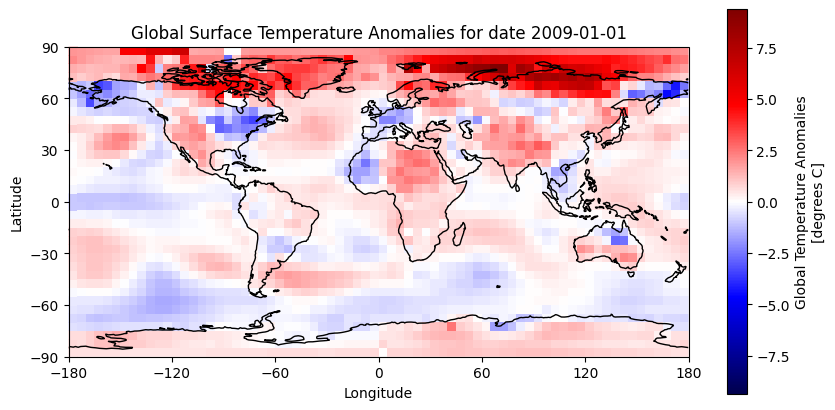

In [53]:
# plot the map of surface temperature 
plot_map(temp_ds, "anom", title="Global Surface Temperature Anomalies")

In [20]:
df_temp = temp_ds.to_dataframe()

In [21]:
df_temp.reset_index(inplace=True)

In [22]:
df_temp

,time,lat,lon,z,anom
0,1850-01-01,-87.5,2.5,0.0,-0.177575
1,1850-01-01,-87.5,7.5,0.0,-0.177575
2,1850-01-01,-87.5,12.5,0.0,-0.177575
3,1850-01-01,-87.5,17.5,0.0,-0.177575
4,1850-01-01,-87.5,22.5,0.0,-0.177575
...,...,...,...,...,...
5412091,2023-12-01,87.5,337.5,0.0,7.650163
5412092,2023-12-01,87.5,342.5,0.0,7.736040
5412093,2023-12-01,87.5,347.5,0.0,7.826920
5412094,2023-12-01,87.5,352.5,0.0,8.140000


### Global Precipitaion Data from NOAA

In [54]:
url =  "http://psl.noaa.gov/thredds/dodsC/Datasets/gpcc/monitor/precip.monitor.mon.total.1x1.v2020.nc"
ds_prep = xr.open_dataset(url)
ds_prep

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, time: 509, nbnds: 2)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2024-05-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    precip     (time, lat, lon) float32 ...
Attributes:
    title:                           GPCP 1x1 Precipitation Monitoring
    Conventions:                     CF-1.0
    history:                         CAS Jul 2021
    platform:                        Observation
    source:                          PSL
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    Original_Source:                 http://www.dwd.de/en/FundE/Klima/KLIS/in...
    Reference:                       Users of the data sets are kindly reques...
    dataset_title:                   Global Precipitation Climatology Centre ...
    DODS_EXTRA.Unlimited_Dimension:  time

In [19]:
ds_prep.data_vars

Data variables:
    precip   (time, lat, lon) float32 ...

In [45]:
ds_prep.precip

<xarray.DataArray 'precip' (time: 1356, lat: 180, lon: 360)>
[87868800 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2013-12-01
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
Attributes:
    long_name:     GPCC Monthly total of precipitation
    statistic:     Total
    valid_range:   [   0. 8000.]
    parent_stat:   Observations
    var_desc:      Precipitation
    actual_range:  [   0.   3153.04]
    dataset:       GPCC Precipitation 1.0degree V7 Full Reanalysis
    units:         mm
    level:         Surface
    _ChunkSizes:   [  1 180 360]

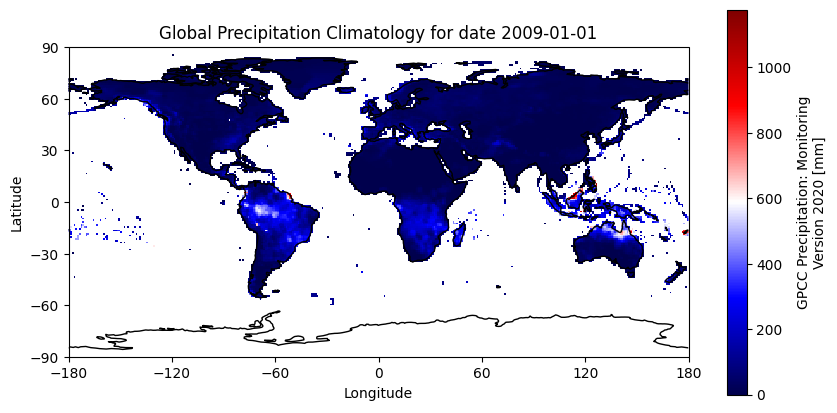

In [55]:
# plot the map of global precipitation
plot_map(ds_prep, "precip", title="Global Precipitation Climatology")

In [56]:
df_prep = ds_prep.to_dataframe()
df_prep

time_bnds        precip
lat   lon   time       nbnds                            
 89.5 0.5   1982-01-01 0      9.969210e+36           NaN
                       1      9.969210e+36           NaN
            1982-02-01 0      9.969210e+36           NaN
                       1      9.969210e+36           NaN
            1982-03-01 0      9.969210e+36           NaN
...                                    ...           ...
-89.5 359.5 2024-03-01 1      9.969210e+36  9.969210e+36
            2024-04-01 0      9.969210e+36  9.969210e+36
                       1      9.969210e+36  9.969210e+36
            2024-05-01 0      9.969210e+36  9.969210e+36
                       1      9.969210e+36  9.969210e+36

[65966400 rows x 2 columns]

In [123]:
land_ds = xr.open_dataset("data/CSR_GRACE_GRACE-FO_RL06_Mascons_v02_LandMask.nc")
land_ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    LO_val   (lat, lon) float32 ...
Attributes: (12/14)
    Conventions:     CF-1.5
    data_reference:  Save, H., S. Bettadpur, B. D. Tapley (2016), High resolu...
    data_author:     Himanshu Save (save@csr.utexas.edu)
    url:             https://doi.org/10.15781/cgq9-nh24
    doi:             10.15781/cgq9-nh24
    summary:         CSR RL06 Mascon V02 Land Mask
    ...              ...
    variable:        Land=1 and Ocean=0
    Longitudes:       LON1_NLONS_DLON=0.125. 1440 0.25
    Latitudes:        LAT1_NLATS_DLAT=-89.875 720 0.25
    label:           Land_Mask_RL06M
    Mask:            Global
    DATE_CREATED:    Fri Jul 12 10:41:31 CDT 2019

In [129]:
land_ds.attrs

{'Conventions': 'CF-1.5',
 'data_reference': 'Save, H., S. Bettadpur, B. D. Tapley (2016), High resolution CSR GRACE RL05 mascons, J. Geophys. Res. Solid Earth',
 'data_author': 'Himanshu Save (save@csr.utexas.edu)',
 'url': 'https://doi.org/10.15781/cgq9-nh24',
 'doi': '10.15781/cgq9-nh24',
 'summary': 'CSR RL06 Mascon V02 Land Mask',
 'filename': 'netcdf/CSR_GRACE_GRACE-FO_RL06_Mascons_v02_LandMask.nc',
 'institution': 'The University of Texas - Center for Space Research (CSR)',
 'variable': 'Land=1 and Ocean=0',
 'Longitudes': ' LON1_NLONS_DLON=0.125. 1440 0.25',
 'Latitudes': ' LAT1_NLATS_DLAT=-89.875 720 0.25',
 'label': 'Land_Mask_RL06M',
 'Mask': 'Global',
 'DATE_CREATED': 'Fri Jul 12 10:41:31 CDT 2019'}

In [113]:
land_ds.LO_val

<xarray.DataArray 'LO_val' (lat: 720, lon: 1440)>
[1036800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Attributes:
    units:       
    long_name:   Land_Mask
    short_name:  LandMask

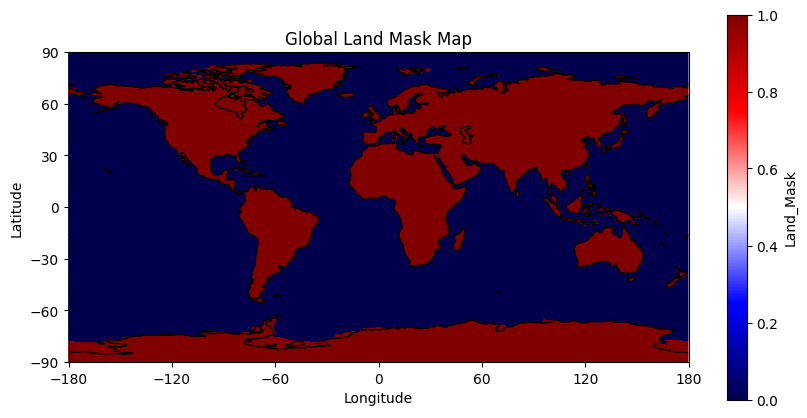

In [125]:
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
land_ds.LO_val.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="seismic")
ax.coastlines()
plt.title(f'Global Land Mask Map')
ax.set_xticks(range(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()